# PCA_for_Spotify_Recs

**Name(s)**: (your name(s) here)

**Website Link**: (your website link)

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
from pathlib import Path

#STEP:2 Imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#STEP:3


## Step 1: Data Cleaning and EDA

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("Data/spotify.csv")
data.head()                    

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
#data.info()

In [5]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Unnecessary columns are dropped so we can focuz on the relevant features:

In [6]:
cols_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name','playlist_name', 'playlist_id', 'mode']
num_data = data.drop(columns=cols_to_drop)
num_data

,track_popularity,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2019-06-14,pop,dance pop,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,2019-12-13,pop,dance pop,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,2019-07-05,pop,dance pop,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,2019-07-19,pop,dance pop,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,2019-03-05,pop,dance pop,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,2014-04-28,edm,progressive electro house,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,2013-03-08,edm,progressive electro house,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,2014-04-21,edm,progressive electro house,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,2014-01-01,edm,progressive electro house,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [7]:
#[x for x in num_data['track_album_release_date'] if len(x) < 5]

In [8]:
num_data['track_album_release_date']

0        2019-06-14
1        2019-12-13
2        2019-07-05
3        2019-07-19
4        2019-03-05
            ...    
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, Length: 32833, dtype: object

In [9]:
num_data['years'] = [int(x.split('-')[0]) for x in num_data['track_album_release_date']]
num_data = num_data.drop(columns = 'track_album_release_date')
num_data

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,66,pop,dance pop,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,67,pop,dance pop,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,70,pop,dance pop,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,60,pop,dance pop,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,69,pop,dance pop,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,edm,progressive electro house,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,20,edm,progressive electro house,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,14,edm,progressive electro house,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,15,edm,progressive electro house,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [10]:
num_data['years']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
32828    2014
32829    2013
32830    2014
32831    2014
32832    2014
Name: years, Length: 32833, dtype: int64

In [11]:
#Number of songs from every year

num_data.groupby('years').count()

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
years,,,,,,,,,,,,,,
1957,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1958,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1960,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1961,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1962,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127
2017,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430
2018,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312


In [12]:
num_data.pivot_table(
    index="playlist_genre",
    columns='years',
    values='track_popularity',
    aggfunc='count'
)

years,1957,1958,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
playlist_genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
edm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,3.0,4.0,3.0,4.0,5.0,3.0,8.0,16.0,29.0,43.0,45.0,37.0,74.0,170.0,313.0,564.0,462.0,498.0,486.0,755.0,2321.0,184.0
latin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,1.0,4.0,2.0,2.0,6.0,5.0,9.0,16.0,11.0,17.0,12.0,3.0,13.0,11.0,18.0,13.0,23.0,21.0,26.0,14.0,26.0,19.0,47.0,76.0,69.0,92.0,101.0,119.0,118.0,126.0,84.0,133.0,123.0,165.0,277.0,375.0,396.0,567.0,1879.0,131.0
pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,2.0,1.0,7.0,4.0,6.0,14.0,8.0,13.0,19.0,9.0,11.0,21.0,9.0,10.0,16.0,7.0,6.0,7.0,15.0,13.0,17.0,12.0,13.0,18.0,9.0,33.0,23.0,28.0,24.0,22.0,50.0,50.0,112.0,95.0,173.0,144.0,176.0,227.0,316.0,479.0,531.0,505.0,704.0,1373.0,170.0
r&b,1.0,NaN,4.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,2.0,4.0,7.0,4.0,5.0,5.0,10.0,8.0,9.0,3.0,5.0,5.0,5.0,3.0,5.0,7.0,10.0,15.0,28.0,31.0,62.0,47.0,77.0,84.0,97.0,80.0,72.0,64.0,89.0,89.0,65.0,75.0,101.0,97.0,100.0,103.0,93.0,107.0,85.0,87.0,131.0,69.0,85.0,125.0,127.0,116.0,199.0,247.0,351.0,464.0,452.0,1107.0,93.0
rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,8.0,35.0,5.0,14.0,25.0,41.0,72.0,80.0,75.0,95.0,49.0,111.0,89.0,54.0,59.0,54.0,98.0,90.0,126.0,101.0,88.0,75.0,58.0,74.0,80.0,117.0,93.0,175.0,235.0,295.0,463.0,705.0,1824.0,159.0
rock,1.0,1.0,NaN,NaN,1.0,4.0,8.0,8.0,16.0,35.0,19.0,50.0,72.0,66.0,68.0,97.0,67.0,99.0,120.0,95.0,116.0,70.0,85.0,66.0,73.0,94.0,108.0,111.0,75.0,114.0,71.0,56.0,46.0,80.0,39.0,51.0,58.0,48.0,35.0,80.0,72.0,67.0,68.0,94.0,59.0,72.0,99.0,176.0,101.0,115.0,142.0,88.0,120.0,97.0,63.0,84.0,105.0,79.0,77.0,116.0,129.0,577.0,48.0


Data is now from 1990 and so forth since we wanted to see how the year affects our results. 

In [13]:
num_data = num_data[num_data['years']>1989]
num_data

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,66,pop,dance pop,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,67,pop,dance pop,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,70,pop,dance pop,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,60,pop,dance pop,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,69,pop,dance pop,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,edm,progressive electro house,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,20,edm,progressive electro house,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,14,edm,progressive electro house,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,15,edm,progressive electro house,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [14]:
num_data.pivot_table(
    index="playlist_genre",
    columns='years',
    values='track_popularity',
    aggfunc='count'
)

years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
playlist_genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
edm,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,3.0,4.0,3.0,4.0,5.0,3.0,8.0,16.0,29.0,43.0,45.0,37.0,74.0,170.0,313.0,564.0,462.0,498.0,486.0,755.0,2321.0,184.0
latin,17.0,12.0,3.0,13.0,11.0,18.0,13.0,23.0,21.0,26.0,14.0,26.0,19.0,47.0,76.0,69.0,92.0,101.0,119.0,118.0,126.0,84.0,133.0,123.0,165.0,277.0,375.0,396.0,567.0,1879.0,131.0
pop,16.0,7.0,6.0,7.0,15.0,13.0,17.0,12.0,13.0,18.0,9.0,33.0,23.0,28.0,24.0,22.0,50.0,50.0,112.0,95.0,173.0,144.0,176.0,227.0,316.0,479.0,531.0,505.0,704.0,1373.0,170.0
r&b,77.0,84.0,97.0,80.0,72.0,64.0,89.0,89.0,65.0,75.0,101.0,97.0,100.0,103.0,93.0,107.0,85.0,87.0,131.0,69.0,85.0,125.0,127.0,116.0,199.0,247.0,351.0,464.0,452.0,1107.0,93.0
rap,14.0,25.0,41.0,72.0,80.0,75.0,95.0,49.0,111.0,89.0,54.0,59.0,54.0,98.0,90.0,126.0,101.0,88.0,75.0,58.0,74.0,80.0,117.0,93.0,175.0,235.0,295.0,463.0,705.0,1824.0,159.0
rock,46.0,80.0,39.0,51.0,58.0,48.0,35.0,80.0,72.0,67.0,68.0,94.0,59.0,72.0,99.0,176.0,101.0,115.0,142.0,88.0,120.0,97.0,63.0,84.0,105.0,79.0,77.0,116.0,129.0,577.0,48.0


In [15]:
num_data.groupby("playlist_genre")['danceability'].mean()

playlist_genre
edm      0.654910
latin    0.713518
pop      0.640174
r&b      0.669703
rap      0.717715
rock     0.509439
Name: danceability, dtype: float64

In [16]:
num_data.groupby("playlist_genre")['energy'].mean()

playlist_genre
edm      0.802778
latin    0.708776
pop      0.700655
r&b      0.588926
rap      0.650945
rock     0.764647
Name: energy, dtype: float64

In [17]:
# 12 major keys from 0 to 11
num_data['key'].max()

np.int64(11)

## Step 2: Dimensionality Reduction and PCA

In [18]:
categorical_columns = ['playlist_genre', 'playlist_subgenre']
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(num_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df

,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
num_data = num_data.drop(columns=categorical_columns)
num_data = pd.concat([num_data, encoded_df], axis=1)
num_data

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66.0,0.748,0.916,6.0,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,0.726,0.815,11.0,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70.0,0.675,0.931,1.0,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,0.718,0.930,7.0,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69.0,0.650,0.833,1.0,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print(num_data.isnull().sum())

num_data = num_data.dropna()
num_data

track_popularity                               2438
danceability                                   2438
energy                                         2438
key                                            2438
loudness                                       2438
speechiness                                    2438
acousticness                                   2438
instrumentalness                               2438
liveness                                       2438
valence                                        2438
tempo                                          2438
duration_ms                                    2438
years                                          2438
playlist_genre_latin                           2438
playlist_genre_pop                             2438
playlist_genre_r&b                             2438
playlist_genre_rap                             2438
playlist_genre_rock                            2438
playlist_subgenre_big room                     2438
playlist_sub

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66.0,0.748,0.916,6.0,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,0.726,0.815,11.0,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70.0,0.675,0.931,1.0,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,0.718,0.930,7.0,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69.0,0.650,0.833,1.0,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,13.0,0.703,0.594,5.0,-6.146,0.0752,0.3420,0.000000,0.1230,0.475,153.848,114893.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30382,70.0,0.543,0.754,0.0,-6.714,0.0639,0.7920,0.000000,0.4990,0.749,166.175,169245.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30383,68.0,0.872,0.399,9.0,-11.145,0.2450,0.3530,0.000083,0.1060,0.915,149.936,120400.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30384,60.0,0.569,0.908,0.0,-2.477,0.0512,0.0677,0.000000,0.7430,0.526,130.142,203495.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
num_cols = num_data.select_dtypes(include=['float64', 'int64']).columns
num_cols.shape

(41,)

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols )
scaled_df

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.919100,0.588440,1.237430,0.164802,1.385315,-0.526586,-0.359704,-0.359296,-0.809038,0.029844,0.062414,-0.479578,0.744622,-0.442019,2.08442,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,4.531179,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,-0.262372,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
1,0.959313,0.435184,0.678631,1.545956,0.568171,-0.725200,-0.491899,-0.339756,1.098559,0.789823,-0.734447,-1.061243,0.744622,-0.442019,2.08442,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,4.531179,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,-0.262372,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
2,1.079954,0.079911,1.320420,-1.216353,1.106051,-0.376206,-0.460637,-0.359188,-0.516718,0.442404,0.133635,-0.807694,0.744622,-0.442019,2.08442,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,4.531179,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,-0.262372,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
3,0.677818,0.379455,1.314887,0.441032,0.984967,-0.113279,-0.687064,-0.359252,0.098002,-1.016754,0.059525,-0.943785,0.744622,-0.442019,2.08442,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,4.531179,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,-0.262372,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
4,1.039741,-0.094243,0.778219,-1.216353,0.672107,-0.738441,-0.456617,-0.359296,-0.691325,0.928790,0.132479,-0.582727,0.744622,-0.442019,2.08442,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,4.531179,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,-0.262372,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27943,-1.212221,0.274963,-0.544089,-0.111429,0.156274,-0.366748,0.712142,-0.359296,-0.431704,-0.156893,1.211333,-1.924262,0.744622,-0.442019,-0.47975,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,-0.220693,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,3.811386,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
27944,1.079954,-0.839622,0.341138,-1.492584,-0.042500,-0.473622,2.721854,-0.359296,2.027180,1.033016,1.656533,-0.941035,0.609339,-0.442019,-0.47975,-0.463537,-0.500693,-0.256559,-0.209214,-0.106253,-0.220693,-0.228862,-0.211994,-0.231705,-0.161568,-0.222824,-0.213097,-0.252094,-0.246426,-0.202414,-0.241071,-0.180624,-0.108806,-0.239572,-0.198454,3.811386,-0.18697,-0.243554,-0.220068,-0.18491,-0.22185
27945,0.999527,1.452242,-1.622959,0.993494,-1.593149,1.239189,0.761268,-0.358910,-0.542877,1.753909,

In [23]:
pca = PCA()
pca.fit(scaled_df)
pca_data = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-2.064452,-1.864059,1.833162,-1.195288,-1.219435,0.873445,1.073545,0.520602,0.105485,0.361676,0.118788,-0.345120,0.604115,1.750481,1.784019,2.371590,-0.070594,-1.279292,-1.086660,-0.120906,0.805100,-0.078725,0.200830,0.269094,-0.641662,0.029721,0.031325,0.200175,-0.062865,-0.100556,0.286185,0.152387,0.194197,-0.489958,0.267820,-0.026888,-6.143655e-16,-1.450075e-15,-7.857246e-16,-1.388790e-15,4.875475e-15
1,-1.776045,-1.610847,1.850387,-1.228303,-1.014646,1.086504,1.041467,0.810930,0.398804,-0.700819,0.671575,-0.527824,0.692640,1.554401,1.515013,2.502242,-0.119004,-1.399067,-0.986809,-0.374505,1.148180,-0.470607,1.238270,0.422900,1.046069,-0.127776,-0.676609,0.032515,0.436751,-0.129783,-0.388379,0.139223,0.051096,0.224549,0.053082,0.009916,-1.702762e-16,-1.894164e-15,-7.302134e-16,-1.000212e-15,4.542408e-15
2,-2.130494,-1.875324,1.794604,-1.210666,-1.201748,0.826643,1.248420,0.305441,0.090625,0.457244,0.279884,-0.391299,0.752771,1.657313,1.855957,2.279874,0.053203,-1.152899,-0.951021,-0.276077,0.972030,0.205937,-1.123664,0.482580,-0.490496,0.099922,-0.088084,0.096746,0.085994,-0.053548,0.276520,0.406364,-0.180741,0.001390,0.324663,0.008667,-1.058455e-15,-1.339053e-15,-1.063280e-15,-1.444302e-15,4.542408e-15
3,-2.015508,-1.913021,1.673377,-1.464967,-1.173102,0.331463,0.884037,0.027960,0.378782,-0.119345,0.250327,-0.330180,0.699363,1.752618,1.632570,2.425791,-0.118390,-1.331783,-0.989944,-0.227195,0.958695,-0.157552,0.351514,0.574599,-0.049301,-0.336436,0.048349,0.011212,-0.337619,0.520038,-0.320021,0.055944,0.133919,-0.826008,0.538842,-0.031747,-1.702762e-16,-1.561097e-15,-7.302134e-16,-7.226566e-16,4.653430e-15
4,-1.980556,-1.466147,1.926284,-1.298095,-0.962177,1.044899,1.174125,0.397990,-0.050763,0.582677,0.275011,-0.438898,0.719133,1.610647,1.859830,2.276834,0.056175,-1.131446,-0.971944,-0.291136,0.971715,0.213873,-1.090799,0.487681,-0.644080,0.104357,-0.305412,0.219042,0.263940,-0.330858,0.139558,0.317095,-0.224358,0.556159,0.090944,0.018490,-1.058455e-15,-1.450075e-15,-1.174303e-15,-1.666346e-15,4.653430e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27943,-0.210103,-0.735219,0.374962,-0.223995,0.324562,-2.021901,-0.091290,0.535942,2.398792,0.305590,0.535549,-0.840301,0.291979,-1.251569,-0.634985,0.133113,-0.235385,0.204127,-0.404990,0.998144,-0.544489,0.174627,-0.197437,0.794400,-1.485956,0.507215,-1.803092,-0.965810,-0.047956,-1.032142,-0.412270,-0.517042,-0.194076,-0.482571,-0.411647,-0.091512,2.660792e-15,-3.587254e-15,-3.200460e-15,-9.585790e-16,-4.186721e-15
27944,-0.513374,-0.370756,0.359740,-0.072231,0.451112,-1.687489,0.726931,-0.297516,2.675180,-0.121521,1.559562,-0.286389,0.365039,-1.738276,-0.740469,0.095016,0.027058,0.161885,-0.188393,0.612148,0.051208,0.221290,-1.566894,1.794494,0.234788,0.078859,-1.082558,-0.440879,1.926116,-2.493044,1.364143,0.134514,-0.621906,0.064491,0.467514,0.001350,2.882837e-15,-3.087654e-15,-3.089437e-15,-1.069601e-15,-5.741033e-15
27945,1.418958,-0.636921,0.956561,0.096742,0.750962,-0.639465,0.804432,1.450990,2.261574,0.132995,1.050470,-0.564890,-0.060894,-1.224509,-0.766592,0.123477,-0.458689,0.143507,-0.483137,0.992989,-0.568545,-0.020169,0.778193,1.356972,-1.554536,0.675360,-1.705638,-1.591641,2.368219,0.033118,-0.214466,-1.046581,-0.850513,0.572637,-0.314720,-0.102885,3.993060e-15,-6.251789e-15,-1.923703e-15,-1.259117e-16,-6.185122e-15
27946,-1.887670,-1.437908,-0.734963,0.353923,-1.170156,-2.044811,0.021284,-0.429936,2.968138,-0.540954,1.669971,-0.299786,1.158111,-1.597013,-0.706339,0.250401,-0.059797,0.155492,-0.186654,0.408860,0.065694,0.117433,-1.622451,0.427721,1.579043,-0.429636,-0.194947,0.409015,1.396280,-1.045574,0.125779,-0.327678,-0.024028,0.294604,-0.

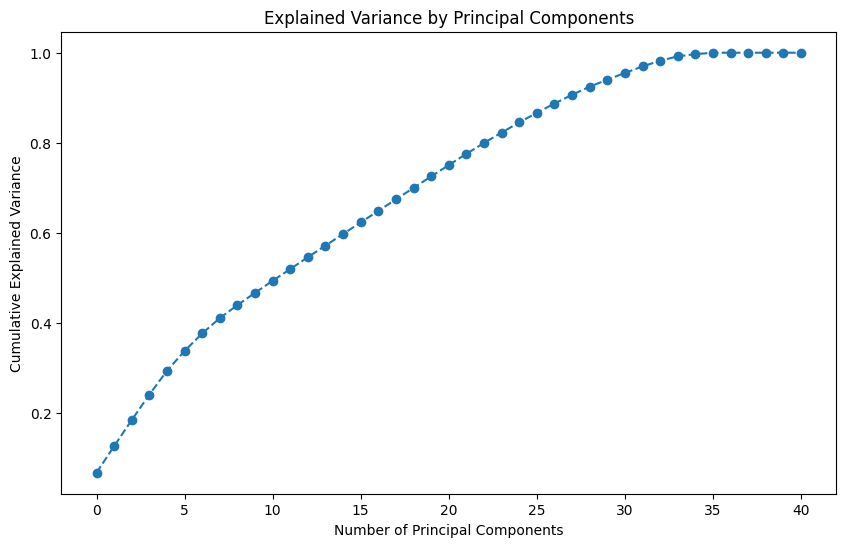

In [24]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [25]:
# Retain only the top components that explain ~95% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data_reduced = pca.fit_transform(scaled_df)

# Convert reduced PCA data to a DataFrame
pca_reduced_df = pd.DataFrame(pca_data_reduced, columns=[f"PC{i+1}" for i in range(n_components)])
print(pca_reduced_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.064452 -1.864059  1.833162 -1.195288 -1.219435  0.873445  1.073545   
1 -1.776045 -1.610847  1.850387 -1.228303 -1.014646  1.086504  1.041467   
2 -2.130494 -1.875324  1.794604 -1.210666 -1.201748  0.826643  1.248420   
3 -2.015508 -1.913021  1.673377 -1.464967 -1.173102  0.331463  0.884037   
4 -1.980556 -1.466147  1.926284 -1.298095 -0.962177  1.044899  1.174125   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.520602  0.105485  0.361676  0.118788 -0.345120  0.604115  1.750481   
1  0.810930  0.398804 -0.700819  0.671575 -0.527824  0.692640  1.554401   
2  0.305441  0.090625  0.457244  0.279884 -0.391299  0.752771  1.657313   
3  0.027960  0.378782 -0.119345  0.250327 -0.330180  0.699363  1.752618   
4  0.397990 -0.050763  0.582677  0.275011 -0.438898  0.719133  1.610647   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  1.784019  2.371590 -

## New DataFrame with same dimensions as scaled_df

In [26]:
scaled_df.shape

(27948, 41)

In [27]:
num_data.shape

(27948, 41)

In [28]:
new_data = data

In [29]:
new_data['years'] = [int(x.split('-')[0]) for x in new_data['track_album_release_date']]

In [30]:
new_data.shape

(32833, 24)

In [31]:
categorical_columns = ['playlist_genre', 'playlist_subgenre']
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(new_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df


,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
new_data = new_data.drop(columns=categorical_columns)
new_data = pd.concat([new_data, encoded_df], axis=1)
new_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2

In [33]:

new_data = num_data.dropna()
new_data

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66.0,0.748,0.916,6.0,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,0.726,0.815,11.0,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70.0,0.675,0.931,1.0,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,0.718,0.930,7.0,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69.0,0.650,0.833,1.0,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,13.0,0.703,0.594,5.0,-6.146,0.0752,0.3420,0.000000,0.1230,0.475,153.848,114893.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30382,70.0,0.543,0.754,0.0,-6.714,0.0639,0.7920,0.000000,0.4990,0.749,166.175,169245.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30383,68.0,0.872,0.399,9.0,-11.145,0.2450,0.3530,0.000083,0.1060,0.915,149.936,120400.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30384,60.0,0.569,0.908,0.0,-2.477,0.0512,0.0677,0.000000,0.7430,0.526,130.142,203495.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
scaled_df.shape

(27948, 41)

## K-Means

In [35]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

In [36]:
n_clusters = 25 
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42) # n_init=10
cluster_labels = kmeans.fit_predict(pca_reduced_df)

In [37]:
print(cluster_labels)

[15 15 15 ...  1  1  1]


In [38]:
pca_reduced_df['Cluster'] = cluster_labels

In [39]:
cluster_sizes = np.bincount(cluster_labels)
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} points")

# Cluster centers
cluster_centers = kmeans.cluster_centers_
""" print("\nCluster Centers:")
print(cluster_centers)
 """
# Silhouette score (to evaluate clustering quality)
silhouette_avg = silhouette_score(pca_reduced_df.iloc[:, :31], cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg}")

Cluster 0: 1291 points
Cluster 1: 1800 points
Cluster 2: 604 points
Cluster 3: 1670 points
Cluster 4: 1600 points
Cluster 5: 1084 points
Cluster 6: 924 points
Cluster 7: 1535 points
Cluster 8: 1565 points
Cluster 9: 1311 points
Cluster 10: 1100 points
Cluster 11: 943 points
Cluster 12: 1424 points
Cluster 13: 373 points
Cluster 14: 1059 points
Cluster 15: 1298 points
Cluster 16: 1202 points
Cluster 17: 1214 points
Cluster 18: 1517 points
Cluster 19: 883 points
Cluster 20: 327 points
Cluster 21: 1172 points
Cluster 22: 312 points
Cluster 23: 951 points
Cluster 24: 789 points

Silhouette Score: 0.4354458566433137


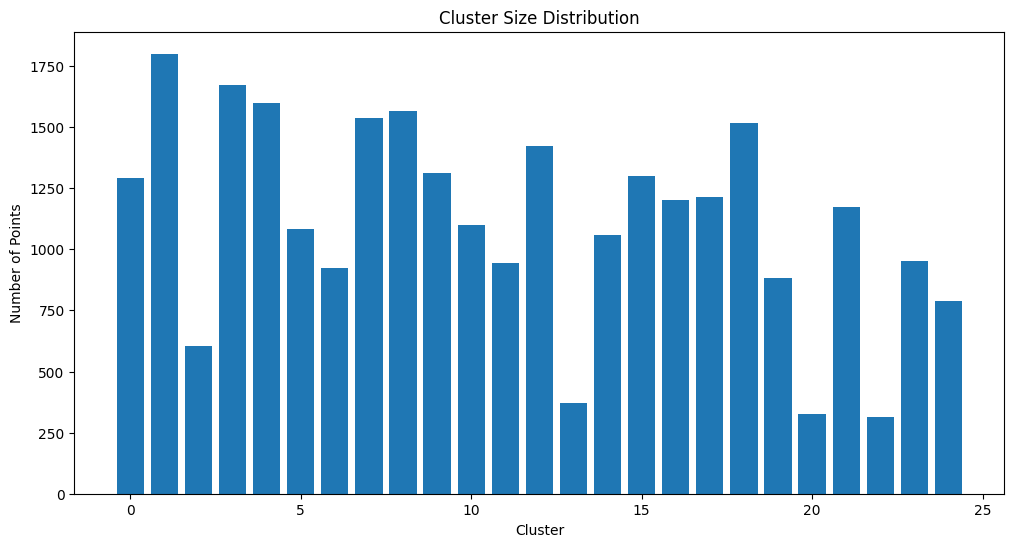

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(n_clusters), cluster_sizes)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.show()

In [41]:
from sklearn.manifold import TSNE

# t-Distributed Stochastic Neighbor Embedding to reduce dimensions so I can graph as a scatterplot

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_reduced_df.iloc[:, :31])

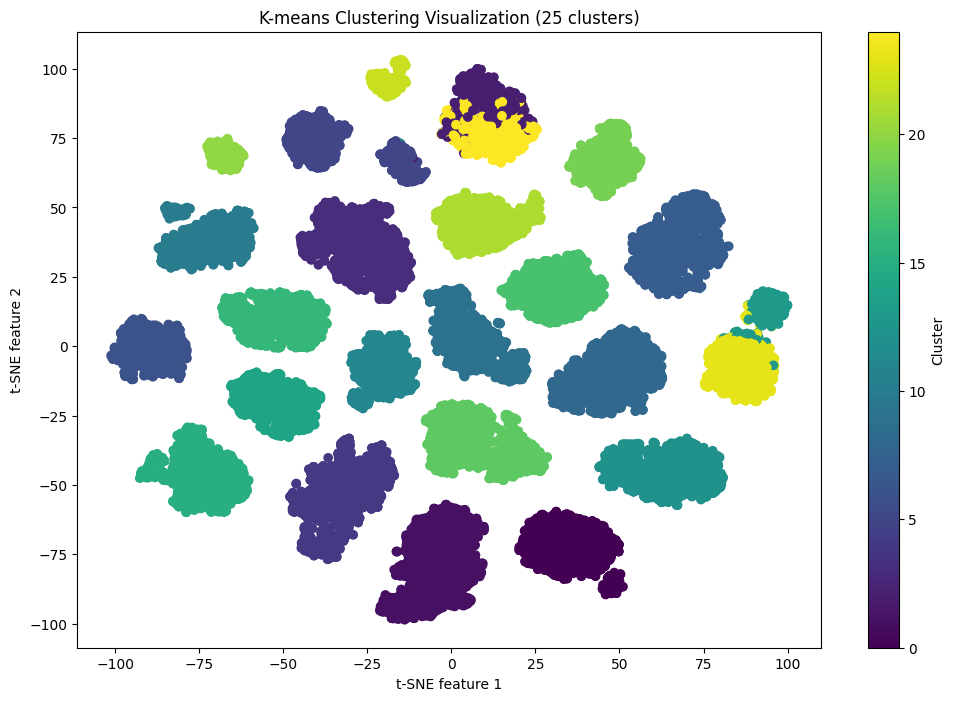

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Visualization (25 clusters)')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [43]:
from sklearn.metrics.pairwise import euclidean_distances

def find_cluster(song_name, new_data, kmeans):
    # Check if the song exists in the dataset
    if song_name not in new_data.index:
        raise ValueError(f"Song '{song_name}' not found in the dataset.")
    
    # Get the features of the input song
    song_features = new_data.loc[song_name].values.reshape(1, -1)
    
    # Predict the cluster for the input song
    cluster = kmeans.fit_predict(song_features)[0]
    return cluster


def recommend_songs(input_song, new_data, kmeans, num_recommendations=5):
    input_cluster = find_cluster(input_song, new_data, kmeans)
    
    # Filter songs in the same cluster
    cluster_songs = new_data[new_data['Cluster'] == input_cluster]
    
    # Remove the input song from recommendations if it's in the cluster
    cluster_songs = cluster_songs[cluster_songs.index != input_song]
    
    # If there are fewer songs in the cluster than requested, return all of them
    if len(cluster_songs) <= num_recommendations:
        return cluster_songs
    
    # Find the most similar songs within the cluster using Euclidean distance
    input_features = new_data.loc[input_song].values.reshape(1, -1)
    distances = euclidean_distances(input_features, cluster_songs.iloc[:, :-1])  # Exclude 'Cluster' column
    most_similar_indices = distances.argsort()[0][:num_recommendations]
    
    recommendations = cluster_songs.iloc[most_similar_indices]
    return recommendations


In [44]:
recommend_songs()

TypeError: recommend_songs() missing 3 required positional arguments: 'input_song', 'new_data', and 'kmeans'

In [ ]:
pca_reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,Cluster
0,-2.064452,-1.864059,1.833162,-1.195288,-1.219435,0.873445,1.073545,0.520602,0.105485,0.361676,0.118788,-0.345120,0.604115,1.750481,1.784019,2.371590,-0.070594,-1.279292,-1.086660,-0.120906,0.805100,-0.078725,0.200830,0.269094,-0.641662,0.029721,0.031325,0.200175,-0.062865,-0.100556,0.286185,15
1,-1.776045,-1.610847,1.850387,-1.228303,-1.014646,1.086504,1.041467,0.810930,0.398804,-0.700819,0.671575,-0.527824,0.692640,1.554401,1.515013,2.502242,-0.119004,-1.399067,-0.986809,-0.374505,1.148180,-0.470607,1.238270,0.422900,1.046069,-0.127776,-0.676609,0.032515,0.436751,-0.129783,-0.388379,15
2,-2.130494,-1.875324,1.794604,-1.210666,-1.201748,0.826643,1.248420,0.305441,0.090625,0.457244,0.279884,-0.391299,0.752771,1.657313,1.855957,2.279874,0.053203,-1.152899,-0.951021,-0.276077,0.972030,0.205937,-1.123664,0.482580,-0.490496,0.099922,-0.088084,0.096746,0.085994,-0.053548,0.276520,15
3,-2.015508,-1.913021,1.673377,-1.464967,-1.173102,0.331463,0.884037,0.027960,0.378782,-0.119345,0.250327,-0.330180,0.699363,1.752618,1.632570,2.425791,-0.118390,-1.331783,-0.989944,-0.227195,0.958695,-0.157552,0.351514,0.574599,-0.049301,-0.336436,0.048349,0.011212,-0.337619,0.520038,-0.320021,15
4,-1.980556,-1.466147,1.926284,-1.298095,-0.962177,1.044899,1.174125,0.397990,-0.050763,0.582677,0.275011,-0.438898,0.719133,1.610647,1.859830,2.276834,0.056175,-1.131446,-0.971944,-0.291136,0.971715,0.213873,-1.090799,0.487681,-0.644080,0.104357,-0.305412,0.219042,0.263940,-0.330858,0.139558,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27943,-0.210103,-0.735219,0.374962,-0.223995,0.324562,-2.021901,-0.091290,0.535942,2.398792,0.305590,0.535549,-0.840301,0.291979,-1.251569,-0.634985,0.133113,-0.235385,0.204127,-0.404990,0.998144,-0.544489,0.174627,-0.197437,0.794400,-1.485956,0.507215,-1.803092,-0.965810,-0.047956,-1.032142,-0.412270,1
27944,-0.513374,-0.370756,0.359740,-0.072231,0.451112,-1.687489,0.726931,-0.297516,2.675180,-0.121521,1.559562,-0.286389,0.365039,-1.738276,-0.740469,0.095016,0.027058,0.161885,-0.188393,0.612148,0.051208,0.221290,-1.566894,1.794494,0.234788,0.078859,-1.082558,-0.440879,1.926116,-2.493044,1.364143,1
27945,1.418958,-0.636921,0.956561,0.096742,0.750962,-0.639465,0.804432,1.450990,2.261574,0.132995,1.050470,-0.564890,-0.060894,-1.224509,-0.766592,0.123477,-0.458689,0.143507,-0.483137,0.992989,-0.568545,-0.020169,0.778193,1.356972,-1.554536,0.675360,-1.705638,-1.591641,2.368219,0.033118,-0.214466,1
27946,-1.887670,-1.437908,-0.734963,0.353923,-1.170156,-2.044811,0.021284,-0.429936,2.968138,-0.540954,1.669971,-0.299786,1.158111,-1.597013,-0.706339,0.250401,-0.059797,0.155492,-0.186654,0.408860,0.065694,0.117433,-1.622451,0.427721,1.579043,-0.429636,-0.194947,0.409015,1.396280,-1.045574,0.125779,1


## Hierachial Clustering (FOR THOSE WHO ARE GOING TO RUN THESE LINES OF CODE, JUST KNOW IT TAKES A FAT MINUTE. IT TOOK LIKE A FEW MINUTES FOR ME I WAS TWEAKINGGGGG)

In [46]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Create the linkage matrix

In [47]:
Z = sch.linkage(pca_data, method='ward')

Step 2: Plot the dendrogram. A dendrogram is a tree diagram that shows how clusters merge based off distance from each other. Where each leaf represents a data point and branches represents the clusters fromed by combining points (and after, clusters).

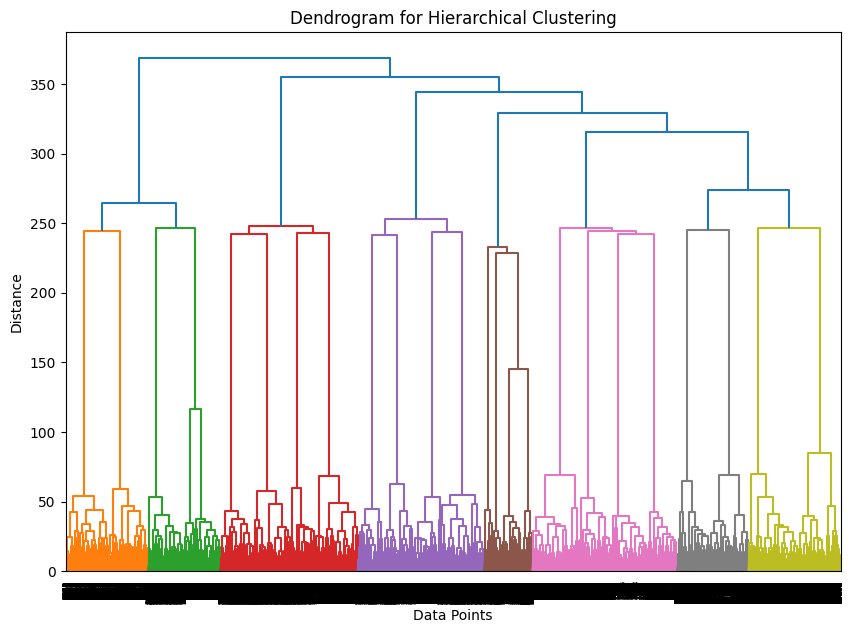

In [48]:
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Step 3: Choose the cutoff for the number of clusters and then create the clusters

In [51]:
from scipy.cluster.hierarchy import fcluster
num_clusters = 8  
labels_hierarchical = fcluster(Z, t=num_clusters, criterion='maxclust')

Step 4: Visualization of the clusters

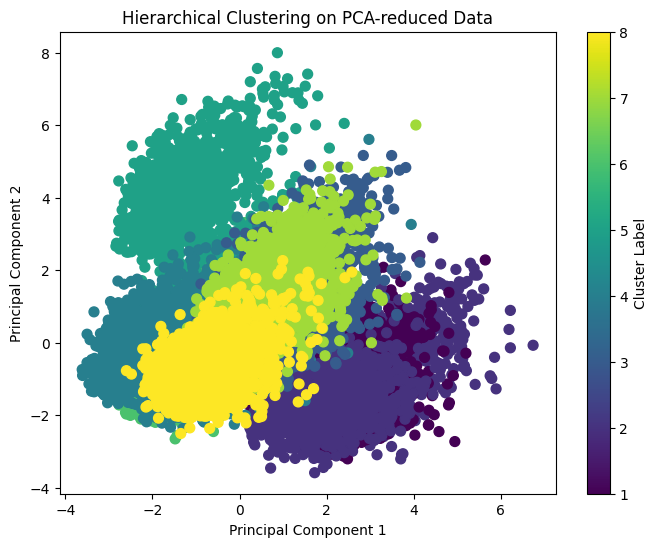

In [52]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_hierarchical, cmap='viridis', s=50)
plt.title('Hierarchical Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [53]:
from sklearn.metrics import silhouette_score
# Calculate the Silhouette Score to evaluate clustering quality
sil_score = silhouette_score(pca_data, labels_hierarchical)
print(sil_score)

0.1691302175358774


what the sil score means (below is pasted from chat, will finish up tmr):
A Silhouette Score of 0.169 is low, indicating that the clustering is not ideal. Here's what it means in general:

Silhouette Score Range: The score ranges from -1 to 1:

1: Perfect clustering (well-separated, compact clusters).
0: The clusters are overlapping or not well-defined.
-1: Poor clustering (points may have been assigned to the wrong cluster).
Your score (0.169) suggests that your clusters are not well-separated or compact. While it's positive (meaning the clustering is better than random), it's quite close to 0, which implies that there is some overlap between the clusters or they are not well-formed.

What Does It Mean for Your Clustering?
The clusters might be somewhat distinguishable but still show significant overlap or may not be tight enough to indicate strong, well-separated groupings.
If you're aiming for better clustering, you might consider adjusting the following:
Number of Clusters: Experiment with different numbers of clusters. Maybe 5 clusters isn't the optimal choice—try values like 3 or 7.
Linkage Method: Try using different hierarchical clustering methods (like single, complete, or average) to see if they improve the score.
Scaling and Preprocessing: If your data wasn't properly standardized or transformed before PCA, it can impact clustering quality. Ensure that your data was appropriately preprocessed.
What To Do Next
Visual Inspection: After plotting the clusters, visually inspect whether the clusters seem distinct or if there's overlap. If the clusters appear ambiguous or tangled, consider adjusting the clustering method or the number of clusters.
Experiment: Try running the hierarchical clustering again with different numbers of clusters or try using different clustering methods, like K-Means, to see if the result improves.
Would you like help experimenting with other clustering configurations or methods?






